<a href="https://colab.research.google.com/github/benzine01/Ebenezer_Ise/blob/master/DSQiiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing our DataSet from GitHub Repo
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sn
url = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
fuel_data = pd.read_csv(url, error_bad_lines=False)
fuel_data.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [4]:
#check for Missing value
fuel_data.info() 
#to get the percentage of missing value in each colummn
(fuel_data.isnull().sum()/len(fuel_data))*100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


record_id                       0.000000
utility_id_ferc1                0.000000
report_year                     0.000000
plant_name_ferc1                0.000000
fuel_type_code_pudl             0.000000
fuel_unit                       0.609694
fuel_qty_burned                 0.000000
fuel_mmbtu_per_unit             0.000000
fuel_cost_per_unit_burned       0.000000
fuel_cost_per_unit_delivered    0.000000
fuel_cost_per_mmbtu             0.000000
dtype: float64

In [5]:
# Check the  members of the 'fuel_unit' (which is the only column with missing value) column and and their population
fuel_data['fuel_unit'].value_counts() 

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

In [6]:
#we see that 'mcf' has higher count of values, so we can fill up the missing values with this and it will have little or no effect on our data distribution
fuel_data['fuel_unit'] = fuel_data['fuel_unit'].fillna('mcf') #this fills up the rows with missing values
(fuel_data.isnull().sum()/len(fuel_data))*100 #now to check again the percentages of missing data

record_id                       0.0
utility_id_ferc1                0.0
report_year                     0.0
plant_name_ferc1                0.0
fuel_type_code_pudl             0.0
fuel_unit                       0.0
fuel_qty_burned                 0.0
fuel_mmbtu_per_unit             0.0
fuel_cost_per_unit_burned       0.0
fuel_cost_per_unit_delivered    0.0
fuel_cost_per_mmbtu             0.0
dtype: float64

In [7]:
#we can see the quatitiy of fuel burned per fuel type by using the groupby method and summing the values
fu = fuel_data[['fuel_type_code_pudl','fuel_qty_burned']].groupby('fuel_type_code_pudl').sum()
fu

,fuel_qty_burned
fuel_type_code_pudl,
coal,1.626898e+10
gas,5.562880e+10
nuclear,4.462058e+09
oil,5.089737e+08
other,4.923388e+08
waste,5.168139e+07


In [8]:
# we can also group by the year, to see the years with the highest fuel usage
usage_year = fuel_data[['report_year','fuel_qty_burned']].groupby('report_year').sum()
usage_year

,fuel_qty_burned
report_year,
1994,3.364163e+09
1995,4.458192e+09
1996,2.768693e+09
1997,3.077973e+09
1998,3.617070e+09
1999,3.445345e+09
2000,3.394100e+09
2001,3.147821e+09
2002,2.585502e+09


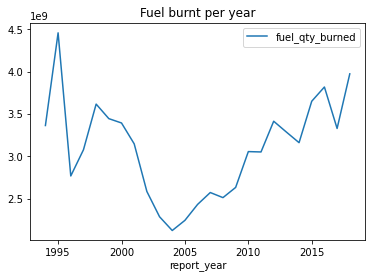

In [9]:
#we could also do a simple plot to veiw the amount of fuel burnt per year
usage_year.plot()
sn.set_style('darkgrid')
plt.title('Fuel burnt per year')
plt.show()

In [10]:
# you could also do a double groupby
fuel_data[['fuel_type_code_pudl','report_year','fuel_qty_burned']].groupby(['fuel_type_code_pudl','report_year']).sum()

fuel_qty_burned
fuel_type_code_pudl report_year                 
coal                1994            7.172082e+08
                    1995            1.257398e+09
                    1996            6.988514e+08
                    1997            8.169024e+08
                    1998            8.982095e+08
...                                          ...
waste               2014            3.607257e+06
                    2015            3.737472e+06
                    2016            3.782403e+06
                    2017            3.534230e+06
                    2018            3.296373e+06

[148 rows x 1 columns]

In [11]:
# Here we are going to consider 'concat' and 'merge' methods
df1 = fuel_data.iloc[:1900]
df2 = fuel_data.iloc[1900:]

# 'merge' method
merged_df = pd.merge(df1,df2, how = 'outer')
merged_df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29523 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.7+ MB


In [13]:
len(df1), len(df2), len(merged_df)


(1900, 27623, 29523)

In [14]:
# To demonstrate concat we need to creat another dataframe. Lets create a dataframe from that has the difference between the fuel cost per unit burned
# and fuel cost per unit delivered
excess_fuel_cost = pd.DataFrame(fuel_data['fuel_cost_per_unit_delivered'] - fuel_data['fuel_cost_per_unit_burned'], columns = ['excess_fuel_cost'])
#Now using the concat method
fuel_data = pd.concat([fuel_data,excess_fuel_cost], axis = 1)
fuel_data.head(3)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,excess_fuel_cost
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121,-0.06
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120,-0.05
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650,-1.60


In [15]:
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29523 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
 11  excess_fuel_cost              29523 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 2.7+ MB
